# Двухфазная фильтрация

## Несжимаемая жидкость

### Уравнения

Уравнения неразрывности и движения для двухфазного потока в неупругой пористой среде
$$ \begin{cases}
\frac{\partial S}{\partial t} + \nabla \cdot (S \vec{u}) = 0 \\
\frac{\partial (1 - S)}{\partial t} + \nabla \cdot \left( \left(1 - S \right) \vec{v} \right) = 0 \\
\vec{u} = -\frac{k}{\mu_1} k^*_1(S) \nabla P \\
\vec{v} = -\frac{k}{\mu_2} k^*_2(S) \nabla P \\
\end{cases} $$

где $S$ - насыщенность пористой среды 1-й фазой

$$ \begin{cases}
\frac{\partial S}{\partial t} + \nabla \cdot (S \vec{u}) = 0 \\
\nabla \cdot (S \vec{u}) + \nabla \cdot \left( \left(1 - S \right) \vec{v} \right) = 0 \\
\vec{u} = -\frac{k}{\mu_1} k^*_1(S) \nabla P \\
\vec{v} = -\frac{k}{\mu_2} k^*_2(S) \nabla P \\
\end{cases} $$

Принимая поток одномерным, получим

$$ \begin{cases}
\frac{\partial S}{\partial t} + \frac{\partial S u}{\partial x} = 0 \\
\frac{\partial S u}{\partial x} + \frac{\partial (1 - S) v}{\partial x} = 0 \\
u = -\frac{k}{\mu_1} k^*_1(S) \frac{\partial P}{\partial x} \\
v = -\frac{k}{\mu_2} k^*_2(S) \frac{\partial P}{\partial x} \\
\end{cases} $$

Подставляя уравнения движения в уравнения неразрывности, получим

$$ \begin{cases}
\frac{\partial S}{\partial t} - \frac{k}{\mu_1} \frac{\partial}{\partial x} \left( k^*_1(S) S \frac{\partial P}{\partial x} \right) = 0 \\

\frac{1}{\mu_1} \frac{\partial}{\partial x} \left(k^*_1(S) S \frac{\partial P}{\partial x} \right) + 
\frac{1}{\mu_2} \frac{\partial}{\partial x} \left( (1 - S)  k^*_2(S) \frac{\partial P}{\partial x} \right)
= 0 \\
\end{cases} \Leftrightarrow $$

$$ \Leftrightarrow \begin{cases}
\frac{\partial S}{\partial t} - 
\frac{k}{\mu_1} \left[ k^*_1(S) S \frac{\partial^2 P}{\partial x^2} + 
\frac{\partial P}{\partial x} \left( S \frac{\partial k^*_1(S) }{\partial x} + k^*_1(S) \frac{\partial S}{\partial x} \right) \right] = 0 \\

\frac{1}{\mu_1} \left[ k^*_1(S) S \frac{\partial^2 P}{\partial x^2} + 
\frac{\partial P}{\partial x} \left( S \frac{\partial k^*_1(S) }{\partial x} + k^*_1(S) \frac{\partial S}{\partial x} \right) \right] + 
\frac{1}{\mu_2} \left[ (1 - S) k_2^*(S) \frac{\partial^2 P}{\partial x^2} +
\frac{\partial P}{\partial x} \left( (1 - S) \frac{\partial k_2^*(S)}{\partial x} -
k_2^*(S) \frac{\partial S}{\partial x} \right) \right]
= 0 \\
\end{cases} \Leftrightarrow $$

$$ \Leftrightarrow \begin{cases}
\frac{\partial S}{\partial t} - \frac{k}{\mu_1} \left[
\frac{\partial^2 P}{\partial x^2}  k^*_1(S) S  +
\frac{\partial P}{\partial x} \left( S \frac{\partial k^*_1(S) }{\partial x} + k^*_1(S) \frac{\partial S}{\partial x} \right) \right]  = 0 \\

\frac{\partial^2 P}{\partial x^2} 
    \left[ \frac{k^*_1(S)}{\mu_1}  S  + \frac{k_2^*(S)}{\mu_2}  (1 - S) \right] +
\frac{\partial P}{\partial x} 
    \left[ 
        \frac{1}{\mu_1} \left( S \frac{\partial k^*_1(S) }{\partial x} + k^*_1(S) \frac{\partial S}{\partial x} \right) 
        +
        \frac{1}{\mu_2} \left( (1 - S) \frac{\partial k_2^*(S)}{\partial x} - k_2^*(S) \frac{\partial S}{\partial x} \right) 
    \right]
= 0 \\
\end{cases} $$

Тут можно попробовать расписать в конечных разностях с $\sigma$ и решать итерационно, но я пойду по пути нахождения явным методом $S$ и неявным $P$ с известным полем насыщенности.

### Численное решение

Пусть область изменения аргументов $(x, t)$ есть прямоугольник $\bar{Д} = (0 ≤ x ≤ L, 0 ≤ t ≤ T)$. Построим на отрезке 0 ≤ x ≤ L сетку $\bar{\omega}_h = \{ x_i = ih,\, i=0,1,...,N \}$. Множество узлов $(x_i, t_n)$ с координатами $x_i = ih$ и $t_n = n\tau$ назовем сеткой в прямоугольнике $\bar{Д}$ и обозначим $\bar{\omega}_{h\tau} = \{ (x_i = ih, t_n = n\tau),\, i = 0,1,...,N, \, n = 0,1,...,N_0 \} $

$$
\frac{S_{i}^{n+1} - S_{i}^{n}}{\tau} - 
\frac{k}{h^2 \mu_1} \left[ k^*_1(S^{n}_{i}) S^{n}_{i} (P^{n}_{i-1} - 2  P^{n}_{i} + P^{n}_{i+1})  -
(P^{n}_{i} - P^{n}_{i-1} ) \left( S^{n}_{i} (k^*_1(S_{i}^{n}) - k^*_1(S_{i-1}^{n}) ) + k^*_1(S_{i}^{n}) (S_{i}^{n} - S_{i-1}^{n}) \right) \right]  = 0 \\
$$

$$
S_{i}^{n+1} = S_{i}^{n} + 
\frac{k \tau}{\mu_1 h^2 } \left[ k^*_1(S^{n}_{i}) S^{n}_{i} \{ P^{n}_{i-1} - 2  P^{n}_{i} + P^{n}_{i+1} \}  -
\{ P^{n}_{i} - P^{n}_{i-1} \} \{ S^{n}_{i} (k^*_1(S_{i}^{n}) - k^*_1(S_{i-1}^{n}) ) + k^*_1(S_{i}^{n}) (S_{i}^{n} - S_{i-1}^{n}) \} \right] \\
$$

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import SLAU

%load_ext autoreload
%autoreload 2

def k1(S):
    return (S - 1)**2

def k2(S):
    return S*S

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [104]:
# Хар-ки породы
k = 0.5 * 10**(-12)

# Флюидов
mu1 = 2 * 10**(-3)
mu2 = 3 * 10**(-3)

# Длина расчетной области
L = 1
T = 100

# Кол-во узловых точек
h = 0.05
tau = 0.001

# Граничные условия (начало и конец расчетной области)
P_L = 2 * 10**6
P_R = 1 * 10**6
S_L = 0.2

# Начальные условия
P_0 = P_R
S_0 = S_L
S_med = 0.99

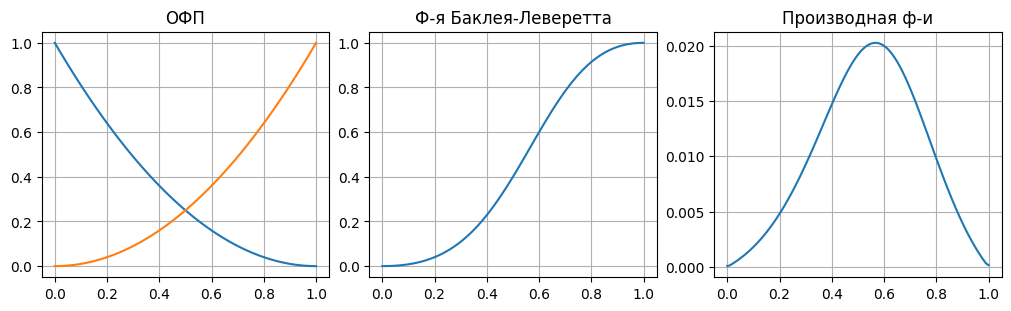

In [105]:
# Графики Баклея-Леверетта
fig, axs = plt.subplots(1, 3, figsize=(10, 3), layout='constrained')

s = np.arange(0, 1.01, 0.01)
mu = mu1 / mu2
f_s = mu * np.array([k2(i) for i in s]) / (mu * np.array([k2(i) for i in s]) + np.array([k1(i) for i in s]))

axs[0].set_title("ОФП")
axs[0].grid()
axs[0].plot(s, [k1(i) for i in s], s, [k2(i) for i in s])


axs[1].plot(s, f_s)
axs[1].grid()
axs[1].set_title("Ф-я Баклея-Леверетта")

axs[2].plot(s, np.gradient(f_s))
axs[2].grid()
axs[2].set_title("Производная ф-и")

plt.show()

In [106]:
x = np.arange(0, L+h, h)
t = np.arange(0, T+tau, tau)

Nl = len(x)
Nt = len(t)

P = np.zeros([Nt, Nl])
P[0, :] = P_0
P[:, 0] = P_L
P[:, -1] = P_R

S = np.zeros([Nt, Nl])
S[0, :] = S_0
S[:, 0] = S_L
S[0, (Nl // 5 * 2) : (Nl // 5 * 3)] = S_med
# S[:, -1] = Sn

U = np.zeros([Nt, Nl])

# Кол-во неизвестных
Nx = Nl - 2 

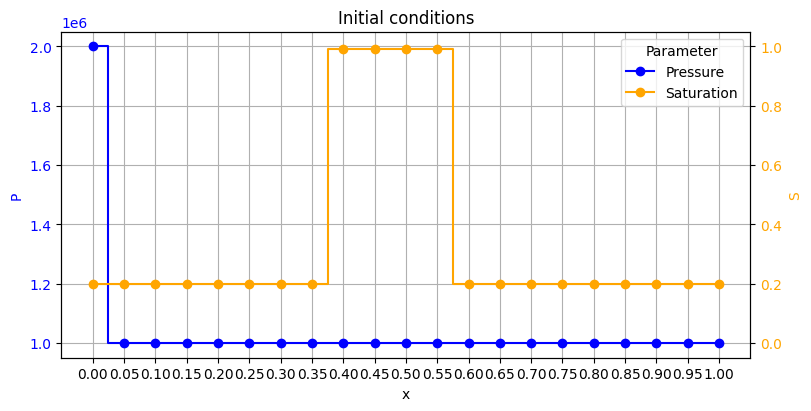

In [107]:
# График начальных условий
fig, ax1 = plt.subplots(figsize=(8, 4), layout='constrained')
ax1.set_xlabel("x")
ax1.set_ylabel("P", color="blue")
plot_1 = ax1.step(x, P[0], where="mid", color="blue", label="Pressure", marker="o")

ax1.tick_params(axis ='y', labelcolor = 'blue') 

ax2 = ax1.twinx()
ax2.set_ylabel("S", color="orange")
plot_2 = ax2.step(x, S[0], where="mid", color="orange", label="Saturation", marker="o")
ax2.tick_params(axis ='y', labelcolor = 'orange')
ax2.set_ylim([-0.05, 1.05])

lns = plot_1 + plot_2
plt.legend(lns, [l.get_label() for l in lns], title="Parameter", loc=0)
ax1.set_title("Initial conditions")

ax1.grid()
ax1.set_xticks(x)
plt.show()

## IMPES scheme

In [108]:
for n in range(1, Nt):
    # Расчет неявным методов давления на n-м слое по насыщенности на (n-1)-м слое
    a = np.zeros(Nx, dtype=float)
    b = np.zeros(Nx, dtype=float)
    c = np.zeros(Nx, dtype=float)
    f = np.zeros(Nx, dtype=float)
    j = 0
    for i in range(1, Nl-1):
        alpha = (S[n-1, i] * k1(S[n-1, i]) - S[n-1, i-1] * k1(S[n-1, i-1])) / mu1 + \
        ((1 - S[n-1, i]) * k2(S[n-1, i]) - (1 - S[n-1, i-1]) * k2(S[n-1, i-1])) / mu2
        beta = S[n-1, i] * k1(S[n-1, i]) / mu1 + (1 - S[n-1, i]) * k2(S[n-1, i]) / mu2

        a[j] = beta - alpha
        b[j] = beta
        c[j] = - alpha + 2 * beta
        f[j] = 0

        j += 1
    
    P[n, 1:-1] = SLAU.tridiagonal_1D_solver(a, b, c, f, P[n, 0], P[n, -1])

    # Расчет явным методом насыщенности на n-м слое по давлению на n-м слое
    for i in range(1, Nl):
        U[n, i] = - k * k1(S[n-1, i]) / mu1 / h * (P[n, i] - P[n, i-1])
        S[n, i] = S[n-1, i] - tau / h * (S[n-1, i] * U[n, i] - S[n-1, i-1] * U[n, i-1])



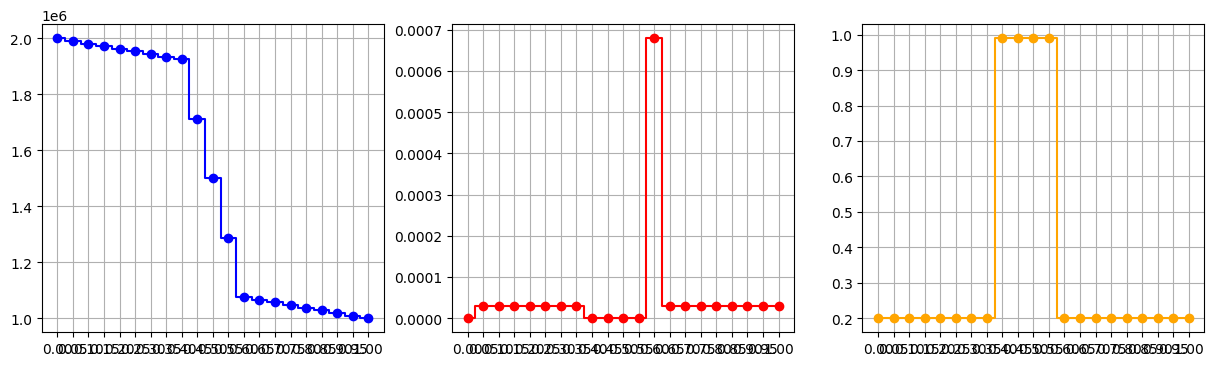

In [109]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].step(x, P[15], where="mid", marker="o", color="blue")
# plt.step(x[:-1], U[1, :], where="mid")
axs[1].step(x, U[15], where="mid", marker="o", color="red")
axs[2].step(x, S[15], where="mid", marker="o", color="orange")
for i in axs:
    i.grid()
    i.set_xticks(x)
plt.show()

**Наблюдаемый скачок скорости нефизичен** объясняется тем, что насыщенность берется в i-й точке, а депрессия в точке i-1/2

1. Разобрать подробнее противопоточную схему возможно ошибка в ней
2. Попробовать другой шаблон для расчета скорости относительно давления

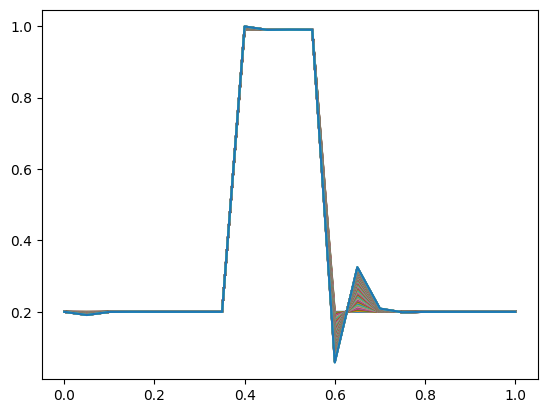

In [110]:
j = 0
for s in S:
    if j % 1000 == 0:
        plt.plot(x, s)
    j += 1

In [111]:
S[-1]

array([0.2       , 0.19107545, 0.19975613, 0.2001366 , 0.20000488,
       0.19999867, 0.19999994, 0.20000001, 0.99902573, 0.98958154,
       0.99026751, 0.98999541, 0.0581951 , 0.32509607, 0.20926422,
       0.19867219, 0.19988628, 0.20001496, 0.20000111, 0.19999988,
       0.19999999])